# Weapon Stats

## Setting Up

In [1]:
import pandas as pd

%run weapon_full_data.ipynb

## Expected Damage

How much damage a weapon can make in a single turn.

In [2]:
average_damage_mean = weapon_data[["weapon", "turn_damage_expected"]]
average_damage_mean = average_damage_mean.groupby("weapon").mean()

In [3]:
average_damage_max = weapon_data[["weapon", "turn_damage_max"]]
average_damage_max = average_damage_max.groupby("weapon").mean()

In [4]:
average_damage = average_damage_max.merge(average_damage_mean, on="weapon")
average_damage = average_damage.sort_values(by=["turn_damage_expected"])
average_damage = average_damage.rename(columns={"damage": "max", "expected_damage": "average"})
average_damage

,turn_damage_max,turn_damage_expected
weapon,,
jet_harpoon,30.0,8.250000
dart_gun,56.0,15.840000
magna_blast_grenade,50.0,17.875000
particle_disturbance_grenade,70.0,25.025000
hidro_jet_cannon,130.0,33.366667
gas_cannon,92.5,35.612500
magna_pack_explosive,100.0,35.750000
heavy_gauss,112.5,39.187500
aqua_jet_cannon_turret,97.5,40.218750


Text(0, 0.5, 'Damage')

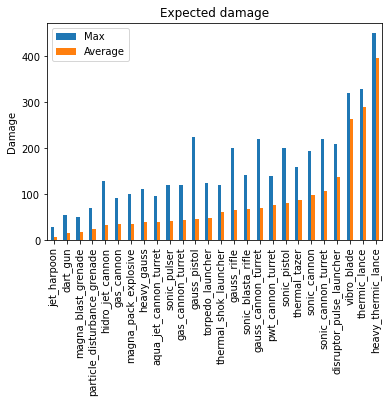

In [5]:
ax = average_damage.plot.bar(title="Expected damage", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

## Ammo

In [6]:
weapon_ammo = weapon_data[["weapon", "capacity"]]
weapon_ammo = weapon_ammo.rename(columns={"capacity": "ammo"})
weapon_ammo = weapon_ammo.groupby("weapon").max()
weapon_ammo = weapon_ammo.sort_values(by=["ammo"])

# Remove weapons with unlimited ammo
weapon_ammo = weapon_ammo[weapon_ammo["ammo"] < 255]

weapon_ammo

,ammo
weapon,
magna_blast_grenade,1.0
disruptor_pulse_launcher,1.0
thermal_shok_launcher,1.0
sonic_pulser,1.0
particle_disturbance_grenade,1.0
magna_pack_explosive,1.0
torpedo_launcher,1.0
heavy_thermic_lance,3.0
thermic_lance,4.0


Text(0, 0.5, 'Shots')

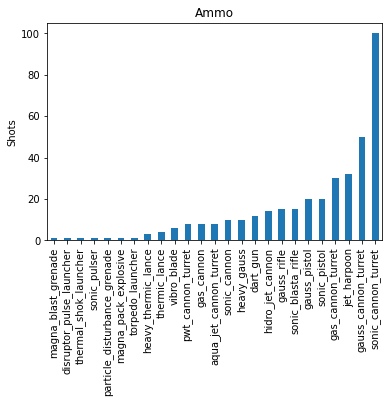

In [7]:
ax = weapon_ammo.plot.bar(title="Ammo", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Shots")

## Damage Per Clip

In [8]:
damage_per_clip = weapon_data[["weapon", "clip_damage"]]
damage_per_clip = damage_per_clip.groupby("weapon").max()
damage_per_clip = damage_per_clip.sort_values(by=["clip_damage"])
damage_per_clip = damage_per_clip.dropna()

# Remove weapons with unlimited ammo
damage_per_clip = damage_per_clip[damage_per_clip["clip_damage"] < 10000]

damage_per_clip

,clip_damage
weapon,
magna_blast_grenade,50.0
particle_disturbance_grenade,70.0
torpedo_launcher,90.0
magna_pack_explosive,100.0
thermal_shok_launcher,120.0
sonic_pulser,120.0
dart_gun,192.0
disruptor_pulse_launcher,210.0
jet_harpoon,320.0


Text(0, 0.5, 'Damage')

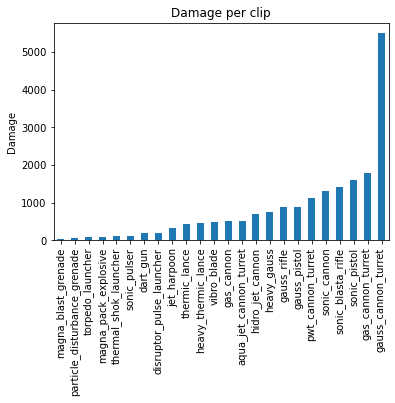

In [9]:
ax = damage_per_clip.plot.bar(title="Damage per clip", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

## Time Units

How much does it cost each use of a weapon? Cost is measured in Time Units.

In [10]:
time_units_max = weapon_data[["weapon", "time_units"]]
time_units_max = time_units_max.groupby("weapon").max()

In [11]:
time_units_average = weapon_data[["weapon", "time_units"]]
time_units_average = time_units_average.groupby("weapon").mean()

In [12]:
time_units = time_units_max.merge(time_units_average, on="weapon")
time_units = time_units.rename(columns={"time_units_x": "time_units_max", "time_units_y": "time_units_avg"})
time_units = time_units.sort_values(by=["time_units_avg"])
time_units

,time_units_max,time_units_avg
weapon,,
vibro_blade,10,10.000000
thermic_lance,15,15.000000
heavy_thermic_lance,20,20.000000
dart_gun,50,35.000000
gauss_pistol,50,35.000000
sonic_pistol,50,40.000000
thermal_tazer,40,40.000000
gauss_rifle,60,43.333333
sonic_cannon_turret,60,45.000000


Text(0, 0.5, 'TUs')

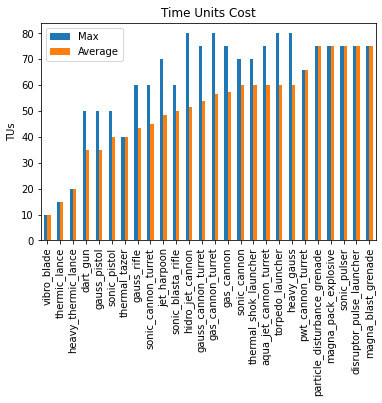

In [13]:
ax = time_units.plot.bar(title="Time Units Cost")
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("TUs")

## Shots Per Turn

Supposing all the attacks are done on auto, or the highest rate of fire setting.

In [14]:
shots_per_turn_max = weapon_data[["weapon", "turn_max_shots"]]
shots_per_turn_max = shots_per_turn_max.groupby("weapon").max()

In [15]:
shots_per_turn_average = weapon_data[["weapon", "turn_max_shots"]]
shots_per_turn_average = shots_per_turn_average.groupby("weapon").mean()
shots_per_turn_average["turn_max_shots"] = shots_per_turn_average.apply(lambda x: int(x["turn_max_shots"]), axis=1)

In [16]:
shots_per_turn = shots_per_turn_max.merge(shots_per_turn_average, on="weapon")
shots_per_turn = shots_per_turn.rename(columns={"turn_max_shots_x": "turn_shots_max", "turn_max_shots_y": "turn_shots_avg"})
shots_per_turn = shots_per_turn.sort_values(by=["turn_shots_avg"])
shots_per_turn

,turn_shots_max,turn_shots_avg
weapon,,
aqua_jet_cannon_turret,2,1
thermal_shok_launcher,1,1
sonic_pulser,1,1
sonic_cannon,2,1
sonic_blasta_rifle,2,1
pwt_cannon_turret,1,1
particle_disturbance_grenade,1,1
magna_pack_explosive,1,1
torpedo_launcher,2,1


Text(0, 0.5, 'Shots')

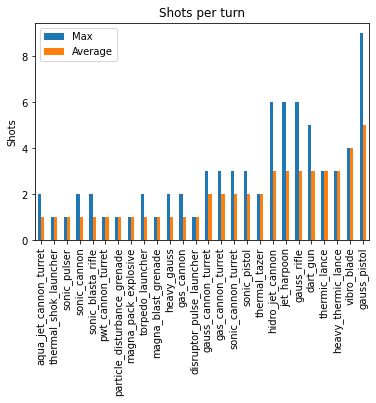

In [17]:
ax = shots_per_turn.plot.bar(title="Shots per turn")
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Shots")

## Turns of Sustained Fire

Weapons with unlimited ammo are not taken into account.

In [18]:
turns_sustained_fire_max = weapon_data[["weapon", "turns_to_reload"]]
turns_sustained_fire_max = turns_sustained_fire_max.groupby("weapon").max()

# Remove weapons with unlimited ammo
turns_sustained_fire_max = turns_sustained_fire_max[turns_sustained_fire_max["turns_to_reload"] < 70]

In [19]:
turns_sustained_fire_average = weapon_data[["weapon", "turns_to_reload"]]
turns_sustained_fire_average = turns_sustained_fire_average.groupby("weapon").mean()

# Remove weapons with unlimited ammo
turns_sustained_fire_average = turns_sustained_fire_average[turns_sustained_fire_average["turns_to_reload"] < 70]

In [20]:
turns_sustained_fire = turns_sustained_fire_max.merge(turns_sustained_fire_average, on="weapon")
turns_sustained_fire = turns_sustained_fire.rename(columns={"turns_to_reload_x": "turns_sustained_fire_max", "turns_to_reload_y": "turns_sustained_fire_avg"})
turns_sustained_fire = turns_sustained_fire.sort_values(by=["turns_sustained_fire_avg"])
turns_sustained_fire

,turns_sustained_fire_max,turns_sustained_fire_avg
weapon,,
thermal_tazer,0.000000,0.000000
torpedo_launcher,1.000000,0.750000
magna_blast_grenade,1.000000,1.000000
disruptor_pulse_launcher,1.000000,1.000000
thermal_shok_launcher,1.000000,1.000000
sonic_pulser,1.000000,1.000000
particle_disturbance_grenade,1.000000,1.000000
magna_pack_explosive,1.000000,1.000000
heavy_thermic_lance,1.000000,1.000000


Text(0, 0.5, 'Turns')

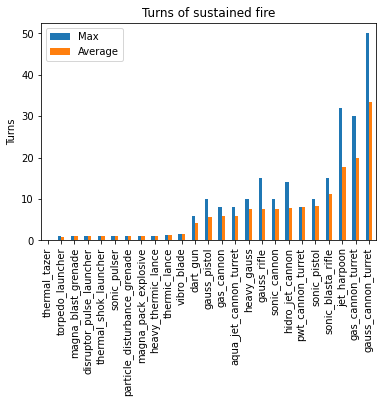

In [21]:
ax = turns_sustained_fire.plot.bar(title="Turns of sustained fire")
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Turns")

## Damage Per Time Unit

In [22]:
damage_per_tu_max = weapon_data[["weapon", "damage_per_time_unit"]]
damage_per_tu_max = damage_per_tu_max.groupby("weapon").max()

In [23]:
damage_per_tu_average = weapon_data[["weapon", "damage_per_time_unit"]]
damage_per_tu_average = damage_per_tu_average.groupby("weapon").mean()

In [24]:
damage_per_tu = damage_per_tu_max.merge(damage_per_tu_average, on="weapon")
damage_per_tu = damage_per_tu.rename(columns={"damage_per_time_unit_x": "damage_per_time_unit_max", "damage_per_time_unit_y": "damage_per_time_unit_avg"})
damage_per_tu = damage_per_tu.sort_values(by=["damage_per_time_unit_avg"])
damage_per_tu

,damage_per_time_unit_max,damage_per_time_unit_avg
weapon,,
jet_harpoon,0.285714,0.226190
dart_gun,0.800000,0.560000
magna_blast_grenade,0.666667,0.666667
particle_disturbance_grenade,0.933333,0.933333
hidro_jet_cannon,1.428571,0.954365
aqua_jet_cannon_turret,1.444444,1.155556
gas_cannon,1.625000,1.181944
gas_cannon_turret,1.818182,1.284091
magna_pack_explosive,1.333333,1.333333


Text(0, 0.5, 'Ratio')

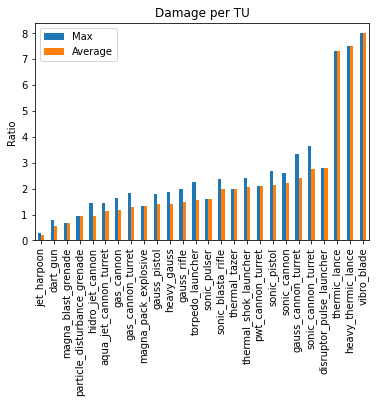

In [25]:
ax = damage_per_tu.plot.bar(title="Damage per TU")
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")